In [121]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
from pytesseract import Output
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Découpage de la photo

Il y a 1 visage(s).


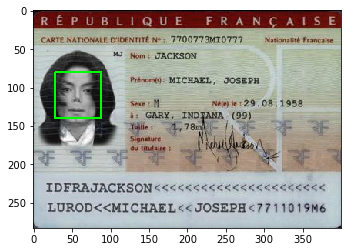

In [122]:
imagePath = r'ci.jpg'
dirCascadeFiles = r'../opencv/haarcascades_cuda/'
# Récupération de fichiers préconfigurés : https://github.com/opencv/opencv/tree/3.4/data/haarcascades
cascadefile = dirCascadeFiles + "haarcascade_frontalface_default.xml"
classCascade = cv2.CascadeClassifier(cascadefile)

image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cascadefile = dirCascadeFiles + "haarcascade_frontalface_default.xml"
classCascade = cv2.CascadeClassifier(cascadefile)
faces = classCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)
print("Il y a {0} visage(s).".format(len(faces)))
# Coordonnées des rectangles des visages détectés (x, y, w, h)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(image)

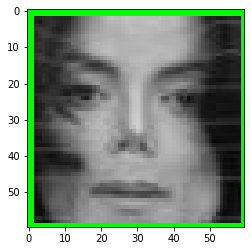

In [123]:
f = faces[0]
plt.imshow(image[f[1]:f[1]+f[3], f[0]:f[0]+f[2]])

# Récupération des autres informations

## Tesseract Sans retouche

In [124]:
print(pytesseract.image_to_string(image))

REPUBLIQUE FRANCAISE
‘CARTE NATIONALE DIDENTITE Ne 7700773MIO777__Nationaité Francaise
MS Nom! JACKSON

    

Prtnomiy: MICHAEL, JOSEPH

Sexe: H Nef le: 29.08, 1958

 

IDFRAJACKSON<<<<<<<<<ccccccccceece
LUROD<<MICHAEL<< JOSEPH<7711019M6


## Trop de fonds avec une carte d'identité, il va falloir retravailler l'image

REPUBLIQUE FRANCAISE
‘CARIE NATIONALE DIDENTTE N= 7700773MTO777 Nationale Fancale

 

MC Nom JACKSON

Prenomis MICHAEL, JOSEPH

see t tee: 29.08.1958
H GARY, ENDJANA (99)

Yate

‘Sigrare

wigs

 

IDFRAJACKSON<<cecececcccececenc cee
LUROD<<MICHAEL«< JOSEPH <7711019M6


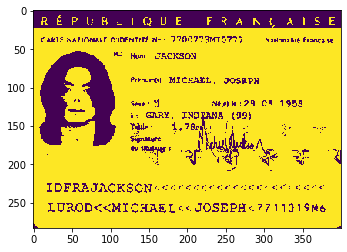

In [137]:
# Niveaux de gris
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Réduction de bruits
def remove_noise(image):
    return cv2.medianBlur(image,1)
# Seuillage
def thresholding(image):
    return cv2.threshold(image, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

finalimage = remove_noise(thresholding(grayscale(image)))
plt.imshow(finalimage)
texteCI = pytesseract.image_to_string(finalimage)
print(texteCI)

In [136]:
def RemoveEmptyLines(entree):
    tab = entree.strip()
    tableausansvide = [ x for x in tab.splitlines() if x!='' ]
    res = ''
    for i in range(0, len(tableausansvide)):
        res = res + tableausansvide[i] + '\n'
    return res

def getTextBetween(mainString, startWord, endWord):
    start = mainString.find(startWord) + len(startWord)
    end = mainString.find(endWord)
    return RemoveEmptyLines(mainString[start:end])

def getCIInfos(texte):
    Nom = getTextBetween(texte, "Nom:", "Prenomis")
    Prenom = getTextBetween(texte, "Prenomis", "see")
    return Prenom.replace("\n",""), Nom.replace("\n","")

n, m = getCIInfos(texteCI)

In [128]:
print ("Nom et prénom: {0}|{1}".format (n, m))

Nom et prénom: MICHAEL, JOSEPH|JACKSON


## Tentons une approche ciblée (sur le nom de famille)

In [129]:
np.shape(image)

(283, 400, 3)

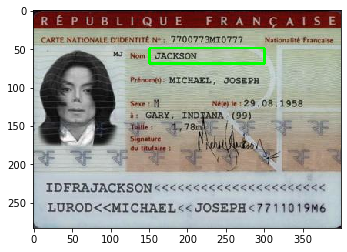

In [130]:
image = cv2.imread(imagePath)
x = 151
y = 49
w = 300
h = 69
plt.imshow(cv2.rectangle(image, (x, y), (w, h), (0, 255, 0), 2))

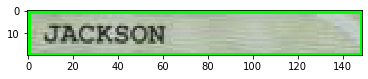

In [131]:
region_Nom = image[y:h, x:w]
plt.imshow(region_Nom)

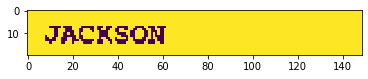

In [132]:
region_Nom = remove_noise(thresholding(grayscale(region_Nom)))
plt.imshow(region_Nom)

In [133]:
NomCI = pytesseract.image_to_string(region_Nom)
print(NomCI)

JACKSON
